In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


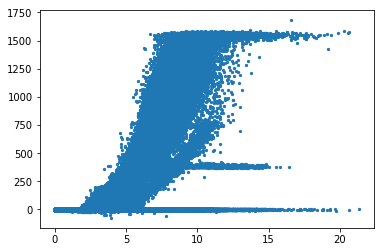

In [30]:
#读取数据
dataset = pd.read_csv('2-Copy1.csv',encoding='ANSI')
#丢弃缺失数据，数据类型转换
dataset.dropna(how='any',inplace=True)
#数据读入
x=dataset['风速'].values
p=dataset['功率'].values
#数据可视化
plt.scatter(x,p,s=5)

In [4]:
x.shape

(483889,)

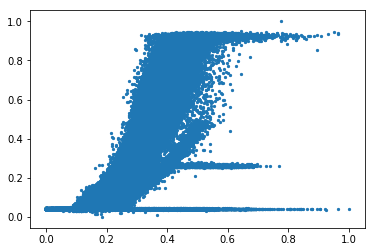

In [4]:
#数据归一化
min_max_scaler_x = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler_x.fit_transform(x.reshape(-1, 1))

min_max_scaler_p = preprocessing.MinMaxScaler()
p_minmax = min_max_scaler_p.fit_transform(p.reshape(-1, 1))
plt.scatter(x_minmax,p_minmax,s=5)

In [5]:
#数据划分 训练数据：80% 测试数据：20%
import math
train_size=math.ceil(0.8*x.shape[0])
test_size=x.shape[0]-train_size

x_train=x_minmax[0:train_size]
x_test=x_minmax[train_size:]
p_train=p_minmax[0:train_size]
p_test=p_minmax[train_size:]

# x_train=x[0:train_size]
# x_test=x[train_size:]
# p_train=p[0:train_size]
# p_test=p[train_size:]

In [19]:
def huber_quantile(y_true,y_pred,q=0.5,delta=0.05):
    q= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    q=K.variable(q, dtype=None, name=None, constraint=None)
    e_huber=y_true-y_pred[4]
    e_quantile= (y_true-y_pred)
    residual = K.abs(e_huber)
    condition = K.less(residual, delta)
    small_res = 0.5 * K.square(residual)
    large_res = delta * residual - 0.5 * K.square(delta) 
    huber= tf.where(condition, small_res, large_res)
    quantile=K.mean(K.mean(K.maximum(q*e_quantile, (q-1)*e_quantile),axis=1),axis=0)
    huber_quantile=quantile+huber
    return  huber_quantile

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="relu", units=64)`
  """
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  import sys


Train on 348400 samples, validate on 38712 samples
Epoch 1/200
348400/348400 [==============================] - 16s 47us/step - loss: 0.0254 - val_loss: 0.0098
Epoch 2/200
348400/348400 [==============================] - 14s 41us/step - loss: 0.0241 - val_loss: 0.0094
Epoch 3/200
348400/348400 [==============================] - 15s 43us/step - loss: 0.0241 - val_loss: 0.0103
Epoch 4/200
348400/348400 [==============================] - 13s 38us/step - loss: 0.0241 - val_loss: 0.0093
Epoch 5/200
348400/348400 [==============================] - 15s 42us/step - loss: 0.0240 - val_loss: 0.0097
Epoch 6/200
348400/348400 [==============================] - 17s 48us/step - loss: 0.0240 - val_loss: 0.0096
Epoch 7/200
348400/348400 [==============================] - 16s 47us/step - loss: 0.0240 - val_loss: 0.0094
Epoch 8/200
348400/348400 [==============================] - 17s 49us/step - loss: 0.0240 - val_loss: 0.0095
Epoch 9/200
348400/348400 [==============================] - 15s 43us/step - 

348400/348400 [==============================] - 15s 43us/step - loss: 0.0238 - val_loss: 0.0097
Epoch 76/200
348400/348400 [==============================] - 15s 42us/step - loss: 0.0238 - val_loss: 0.0094
Epoch 77/200
348400/348400 [==============================] - 15s 43us/step - loss: 0.0238 - val_loss: 0.0094
Epoch 78/200
348400/348400 [==============================] - 15s 42us/step - loss: 0.0238 - val_loss: 0.0095
Epoch 79/200
348400/348400 [==============================] - 15s 42us/step - loss: 0.0238 - val_loss: 0.0096
Epoch 80/200
348400/348400 [==============================] - 15s 43us/step - loss: 0.0238 - val_loss: 0.0094
Epoch 81/200
348400/348400 [==============================] - 15s 43us/step - loss: 0.0238 - val_loss: 0.0096
Epoch 82/200
348400/348400 [==============================] - 15s 43us/step - loss: 0.0238 - val_loss: 0.0095
Epoch 83/200
348400/348400 [==============================] - 15s 43us/step - loss: 0.0238 - val_loss: 0.0094
Epoch 84/200
348400/348

KeyboardInterrupt: 

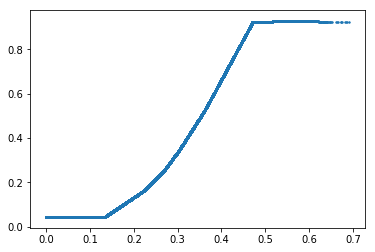

In [25]:
#建立模型
model = Sequential()
model.add(Dense(output_dim=64,input_dim=1,activation='relu'))
model.add(Dense(output_dim=64,activation='relu'))
model.add(Dense(output_dim=9,activation='linear'))
model.compile(optimizer='adam',loss=huber_quantile)

#训练模型
    history = model.fit(x_train, p_train,batch_size=64,epochs=200,verbose=1,shuffle=True,validation_split=0.1)
    p_pred = model.predict(x_test)
    plt.scatter(x_test,p_pred,s=2, label=quantile)
plt.scatter(x_test, p_test,s=1)
plt.ylabel('Power')
plt.xlabel('Windspeed')
plt.legend()
plt.show()

In [22]:
model_mse = Sequential()
model_mse.add(Dense(output_dim=64,input_dim=1,activation='relu'))
model_mse.add(Dense(output_dim=64,activation='relu'))
model_mse.add(Dense(output_dim=1,activation='linear'))
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_mse.compile(optimizer='adam',loss='mse')
# model.compile(optimizer='adam',loss='mse')

#训练模型
history_mse = model_mse.fit(x_train, p_train,batch_size=64,epochs=200,verbose=1,shuffle=True,validation_split=0.1)
p_pred_mse = model_mse.predict(x_test)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="relu", units=64)`
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  after removing the cwd from sys.path.


Train on 348400 samples, validate on 38712 samples
Epoch 1/200
348400/348400 [==============================] - 12s 36us/step - loss: 0.0120 - val_loss: 0.0022
Epoch 2/200
348400/348400 [==============================] - 12s 35us/step - loss: 0.0113 - val_loss: 0.0022
Epoch 3/200
348400/348400 [==============================] - 11s 33us/step - loss: 0.0113 - val_loss: 0.0020
Epoch 4/200
348400/348400 [==============================] - 13s 38us/step - loss: 0.0113 - val_loss: 0.0022
Epoch 5/200
348400/348400 [==============================] - 14s 40us/step - loss: 0.0113 - val_loss: 0.0021
Epoch 6/200
348400/348400 [==============================] - 13s 38us/step - loss: 0.0112 - val_loss: 0.0020
Epoch 7/200
348400/348400 [==============================] - 16s 46us/step - loss: 0.0113 - val_loss: 0.0020
Epoch 8/200
348400/348400 [==============================] - 14s 42us/step - loss: 0.0112 - val_loss: 0.0020
Epoch 9/200
348400/348400 [==============================] - 15s 44us/step - 

348400/348400 [==============================] - 15s 42us/step - loss: 0.0112 - val_loss: 0.0021
Epoch 76/200
348400/348400 [==============================] - 15s 44us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 77/200
348400/348400 [==============================] - 17s 50us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 78/200
348400/348400 [==============================] - 15s 44us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 79/200
348400/348400 [==============================] - 16s 47us/step - loss: 0.0112 - val_loss: 0.0022
Epoch 80/200
348400/348400 [==============================] - 15s 43us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 81/200
348400/348400 [==============================] - 15s 44us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 82/200
348400/348400 [==============================] - 14s 41us/step - loss: 0.0111 - val_loss: 0.0020
Epoch 83/200
348400/348400 [==============================] - 14s 40us/step - loss: 0.0111 - val_loss: 0.0021
Epoch 84/200
348400/348

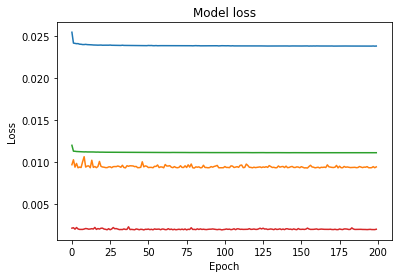

In [23]:
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_mse.history['loss'])
plt.plot(history_mse.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Validate'], loc='upper right')
plt.show()

RMSE: 6.719138%
RMSE: 6.834147%


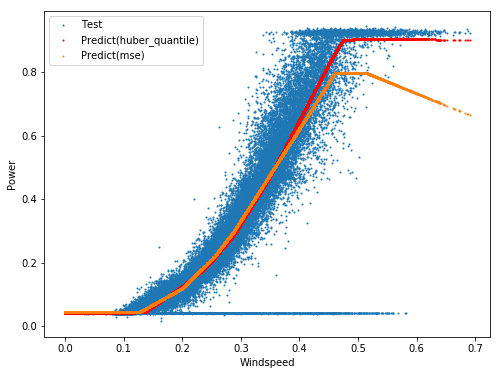

In [28]:
#可视化结果
p_pred = model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(x_test, p_test,s=1)
plt.scatter(x_test,p_pred ,s=1,color='red')
plt.scatter(x_test, p_pred_mse,s=1)

plt.ylabel('Power')
plt.xlabel('Windspeed')
plt.legend(['Test', 'Predict(huber_quantile)','Predict(mse)'], loc='upper left')
#误差分析
RMSE=100*np.sqrt(np.mean((p_test[:,0]-p_pred[:,0])**2))
print("RMSE: %f" % RMSE + "%")

RMSE=100*np.sqrt(np.mean((p_test[:,0]-p_pred_mse[:,0])**2))
print("RMSE: %f" % RMSE + "%")